In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA, 탐색적 데이터 분석

In [5]:
import numpy as np

seed = 1234
np.random.seed(seed)

## 데이터 로드

In [6]:
import pandas as pd

# 데이터 경로 지정 및 읽어오기
data_path = '/content/sample_data/Invistico_Airline.csv'
airplane = pd.read_csv(data_path)

# 데이터 꼴 확인
airplane.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265.0,0.0,0.0,0.0,...,2.0,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0.0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464.0,0.0,0.0,0.0,...,2.0,3.0,4.0,4.0,4.0,2.0,3.0,2.0,310.0,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138.0,0.0,0.0,0.0,...,2.0,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0.0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0.0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354.0,0.0,0.0,0.0,...,4.0,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0.0,0.0


## 기본 분석 및 기초 통계 분석

In [7]:
# 기본 정보
print('#'*20, '기본 정보', '#'*20)
airplane.info() # info() 안에서 자동으로 print를 진행

# 기초 통계량
summary_statistics = airplane.describe(include='all')
print('#'*20, '기초 통계량', '#'*20)
print(summary_statistics)

#################### 기본 정보 ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22122 entries, 0 to 22121
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       22122 non-null  object 
 1   Gender                             22122 non-null  object 
 2   Customer Type                      22122 non-null  object 
 3   Age                                22122 non-null  int64  
 4   Type of Travel                     22122 non-null  object 
 5   Class                              22121 non-null  object 
 6   Flight Distance                    22121 non-null  float64
 7   Seat comfort                       22121 non-null  float64
 8   Departure/Arrival time convenient  22121 non-null  float64
 9   Food and drink                     22121 non-null  float64
 10  Gate location                      22121 non-null  float64
 11  Inflig

In [8]:
airplane.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [9]:
## 데이터 자료형에 따른 column 구분

y_column = ['satisfaction']
numeric_columns = ['Age', 'Flight Distance',
                   'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_columns = ['Seat comfort', 'Departure/Arrival time convenient',
                   'Food and drink', 'Gate location',
                   'Inflight wifi service', 'Inflight entertainment',
                   'Online support', 'Ease of Online booking',
                   'On-board service', 'Leg room service',
                   'Baggage handling', 'Checkin service',
                   'Cleanliness', 'Online boarding']
category_columns = ['Gender', 'Customer Type',
                    'Type of Travel', 'Class']

## 수치형 데이터 분석

### 분포 확인

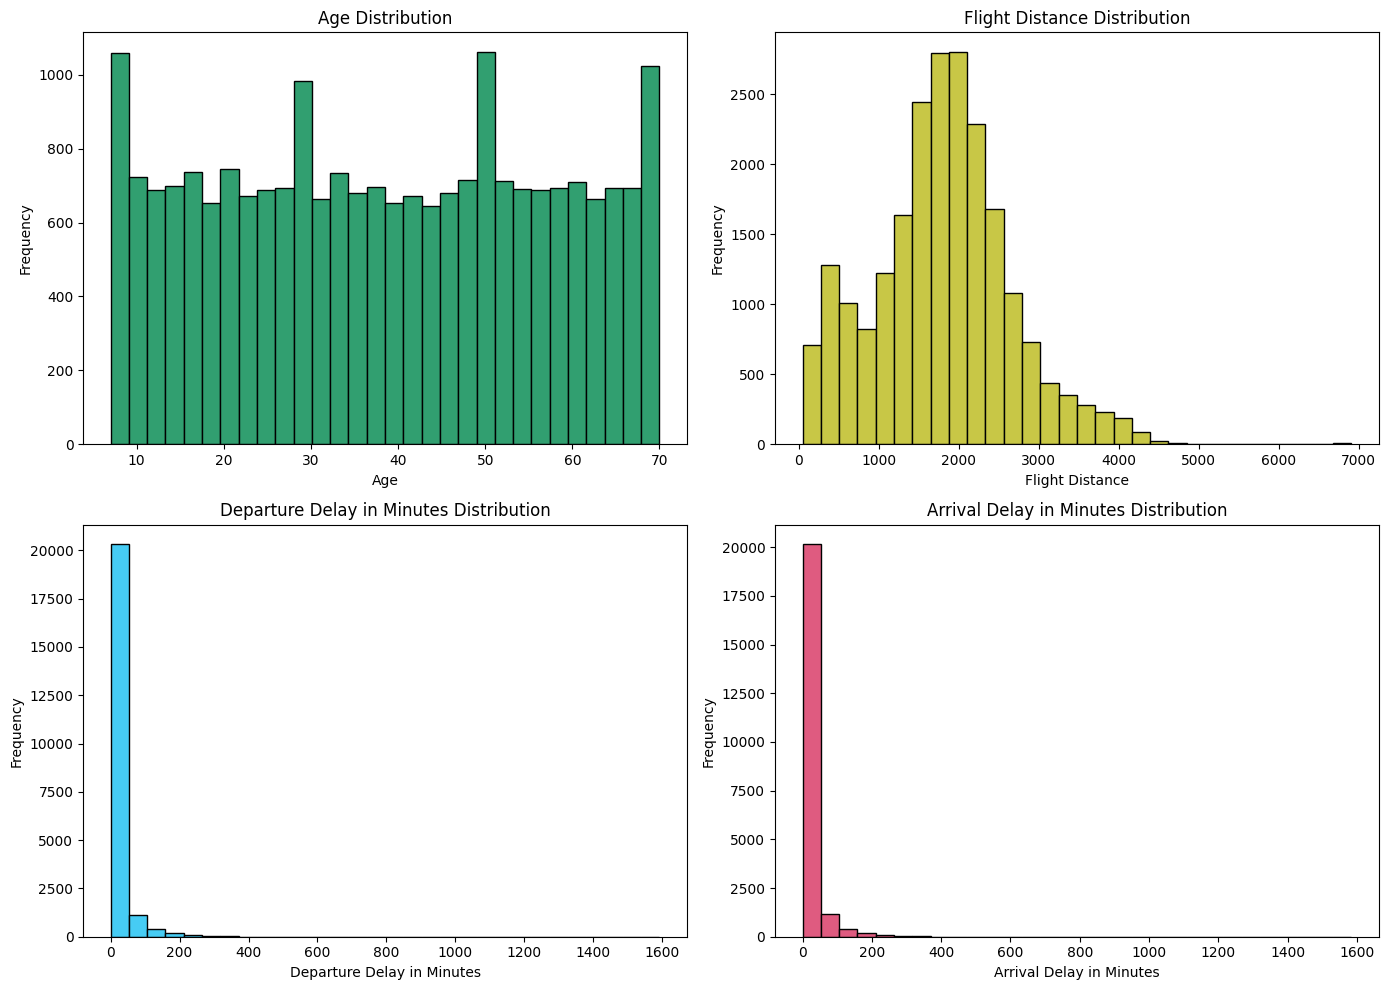

In [10]:
# 전체 데이터 분포 확인

numeric_data = airplane[numeric_columns]

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))

np.random.seed(seed)
for idx, numeric in enumerate(numeric_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(2, 2, idx+1)
    plt.hist(numeric_data[numeric], bins=30, color=col, edgecolor='black')
    plt.title(f'{numeric} Distribution')
    plt.xlabel(numeric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

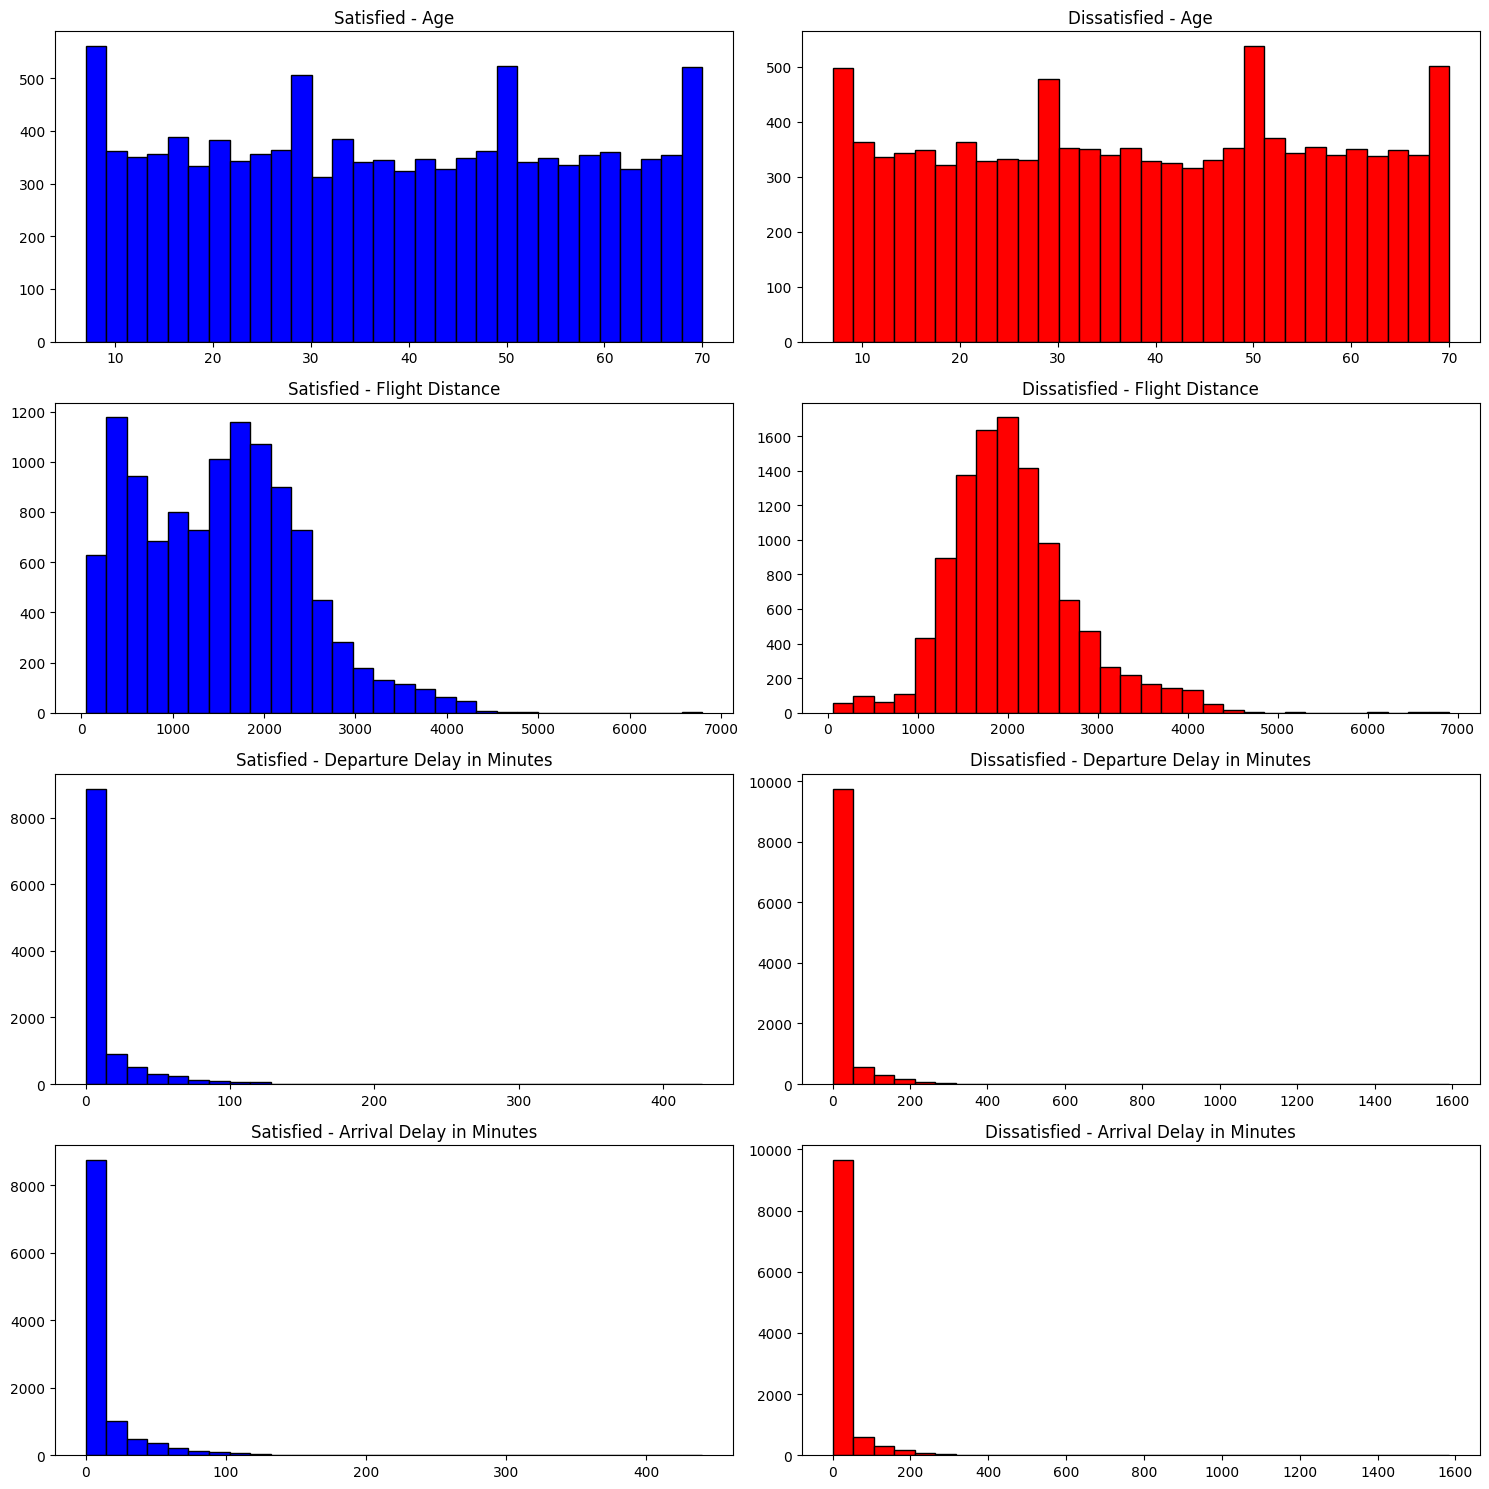

In [11]:
# 클래스 별 시각화
satisfied = airplane[airplane['satisfaction'] == 'satisfied']
dissatisfied = airplane[airplane['satisfaction'] == 'dissatisfied']

plt.figure(figsize=(15, 15))

for idx, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 2, 2*idx + 1)
    plt.hist(satisfied[column], color='blue', label='Satisfied', bins=30, edgecolor='black')
    plt.title(f'Satisfied - {column}')

    plt.subplot(len(numeric_columns), 2, 2*idx + 2)
    plt.hist(dissatisfied[column], color='red', label='Dissatisfied', bins=30, edgecolor='black')
    plt.title(f'Dissatisfied - {column}')

plt.tight_layout()
plt.show()

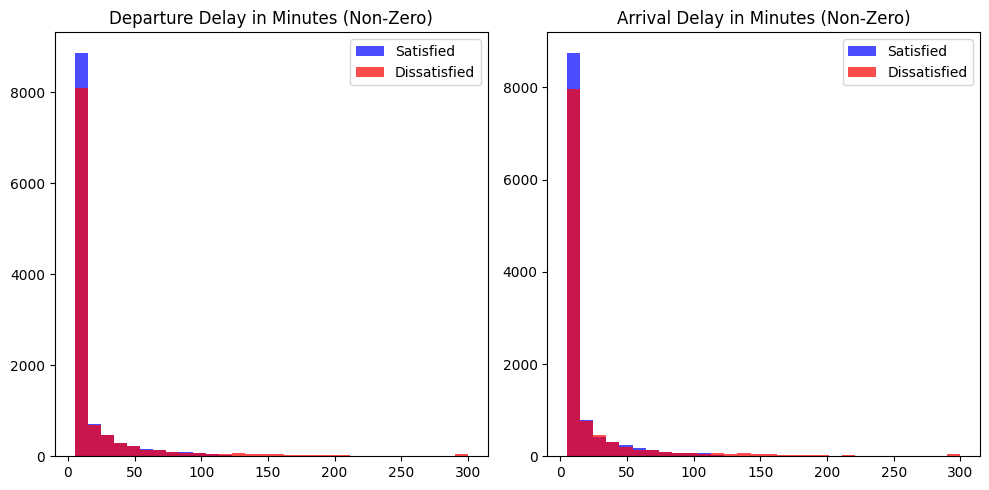

In [12]:
# 특정 시간을 기준으로 clipping 한 결과 시각화

def clip_delays(df, min_value, max_value):
    df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].clip(min_value, max_value)
    df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].clip(min_value, max_value)
    return df

min_delay = 5
max_delay = 300

satisfied_clipped = clip_delays(satisfied.copy(), min_delay, max_delay)
dissatisfied_clipped = clip_delays(dissatisfied.copy(), min_delay, max_delay)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(satisfied_clipped['Departure Delay in Minutes'], color='blue', label='Satisfied', bins=30, alpha=0.7)
plt.hist(dissatisfied_clipped['Departure Delay in Minutes'], color='red', label='Dissatisfied', bins=30, alpha=0.7)
plt.title('Departure Delay in Minutes (Non-Zero)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(satisfied_clipped['Arrival Delay in Minutes'].dropna(), color='blue', label='Satisfied', bins=30, alpha=0.7)
plt.hist(dissatisfied_clipped['Arrival Delay in Minutes'].dropna(), color='red', label='Dissatisfied', bins=30, alpha=0.7)
plt.title('Arrival Delay in Minutes (Non-Zero)')
plt.legend()

plt.tight_layout()
plt.show()

### 아웃라이어 확인

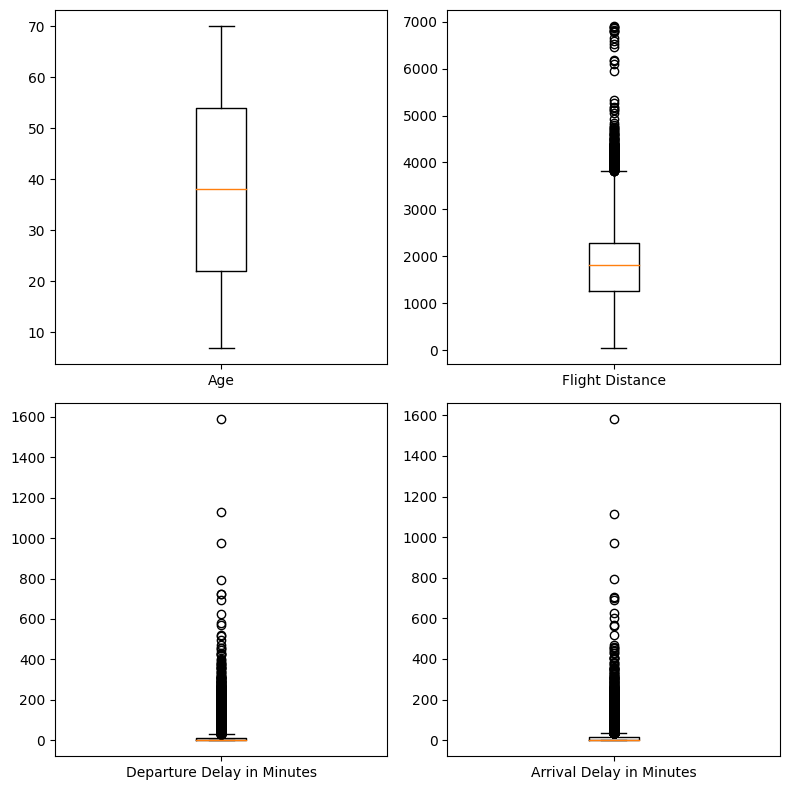

In [13]:
plt.figure(figsize=(8, 8))

np.random.seed(seed)
for idx, numeric in enumerate(numeric_columns) :

    plt.subplot(2, 2, idx+1)
    plt.boxplot(numeric_data[numeric].dropna(), labels=[numeric])

plt.tight_layout()
plt.show()

### 상관관계

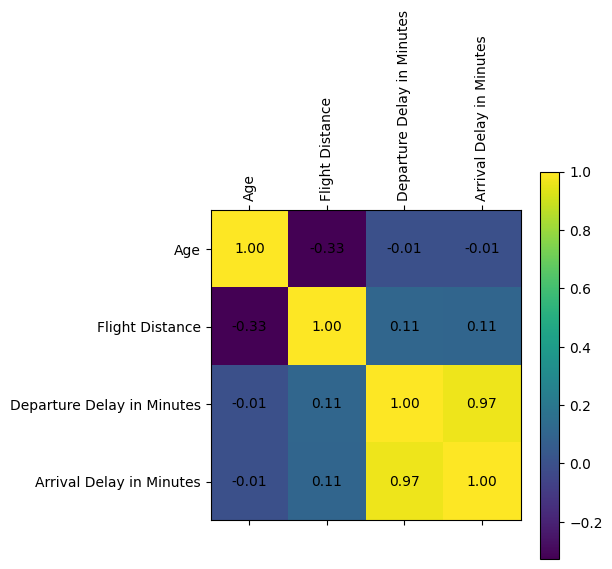

#################### 상관관계 값 확인 ####################
                                 Age  Flight Distance  \
Age                         1.000000        -0.328217   
Flight Distance            -0.328217         1.000000   
Departure Delay in Minutes -0.006445         0.110042   
Arrival Delay in Minutes   -0.006191         0.105374   

                            Departure Delay in Minutes  \
Age                                          -0.006445   
Flight Distance                               0.110042   
Departure Delay in Minutes                    1.000000   
Arrival Delay in Minutes                      0.968220   

                            Arrival Delay in Minutes  
Age                                        -0.006191  
Flight Distance                             0.105374  
Departure Delay in Minutes                  0.968220  
Arrival Delay in Minutes                    1.000000  


In [14]:
correlation_matrix = numeric_data.corr()

# 상관관계 메트릭스 시각화
plt.figure(figsize=(5, 5))

plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

# 상관관계 값 프린트
print('#'*20, '상관관계 값 확인', '#'*20)
print(correlation_matrix)

## 서수형 데이터 분석


### 분포 확인

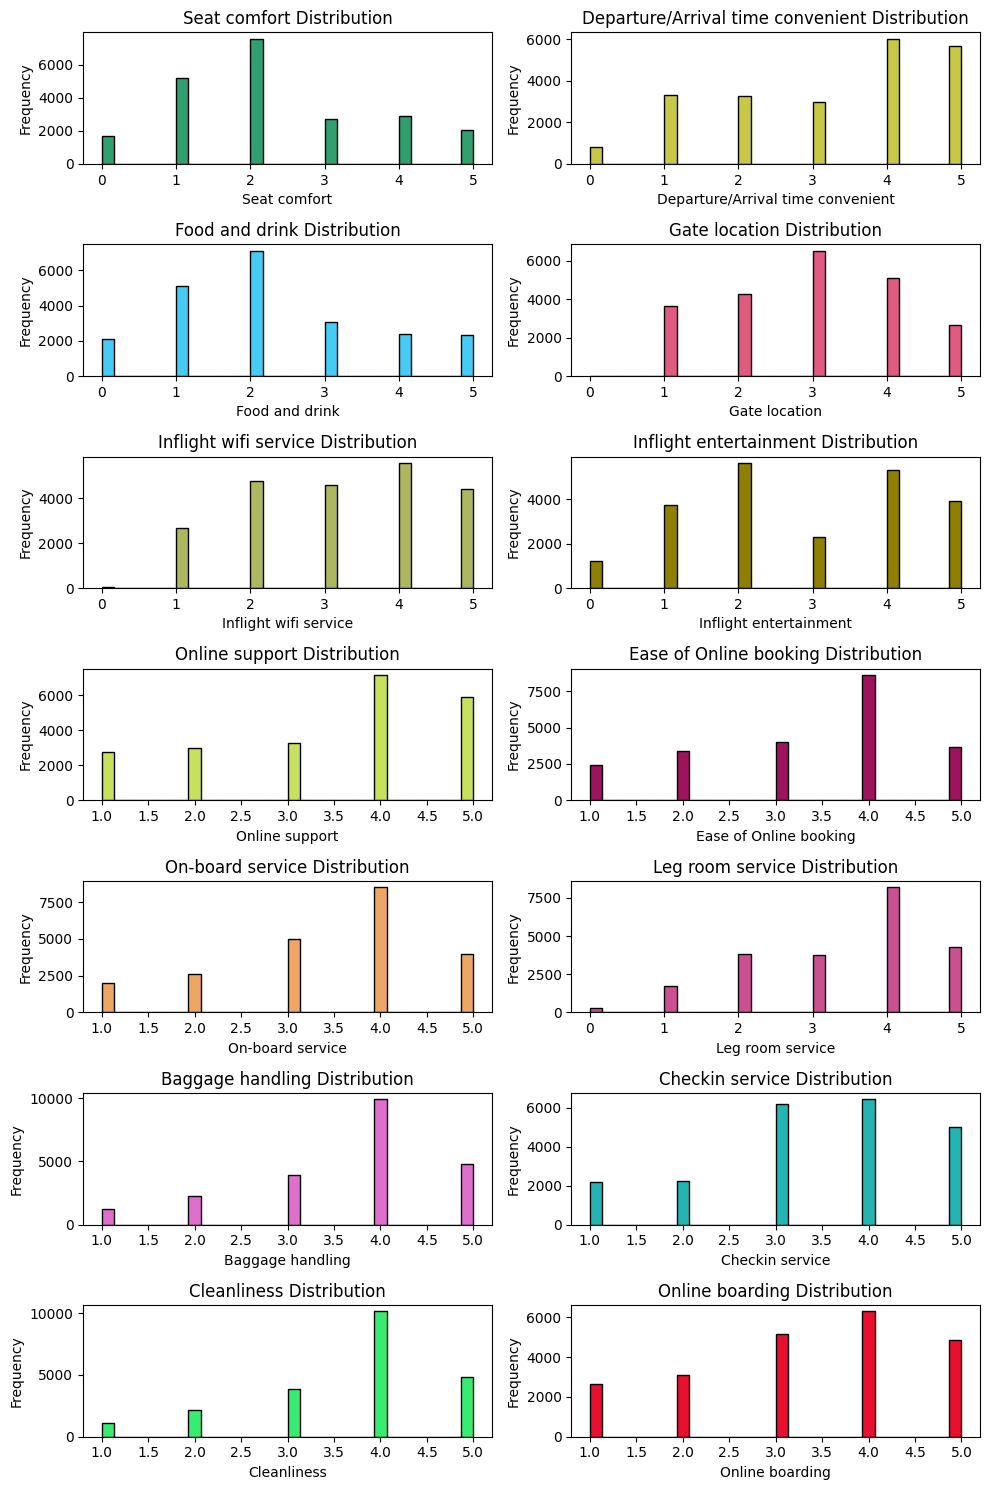

In [15]:
# 전체 데이터 분포 확인
ordinal_data = airplane[ordinal_columns]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 15))

np.random.seed(seed)
for idx, ordinal in enumerate(ordinal_data) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(7, 2, idx+1)
    plt.hist(ordinal_data[ordinal], bins=30, color=col, edgecolor='black')
    plt.title(f'{ordinal} Distribution')
    plt.xlabel(ordinal)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

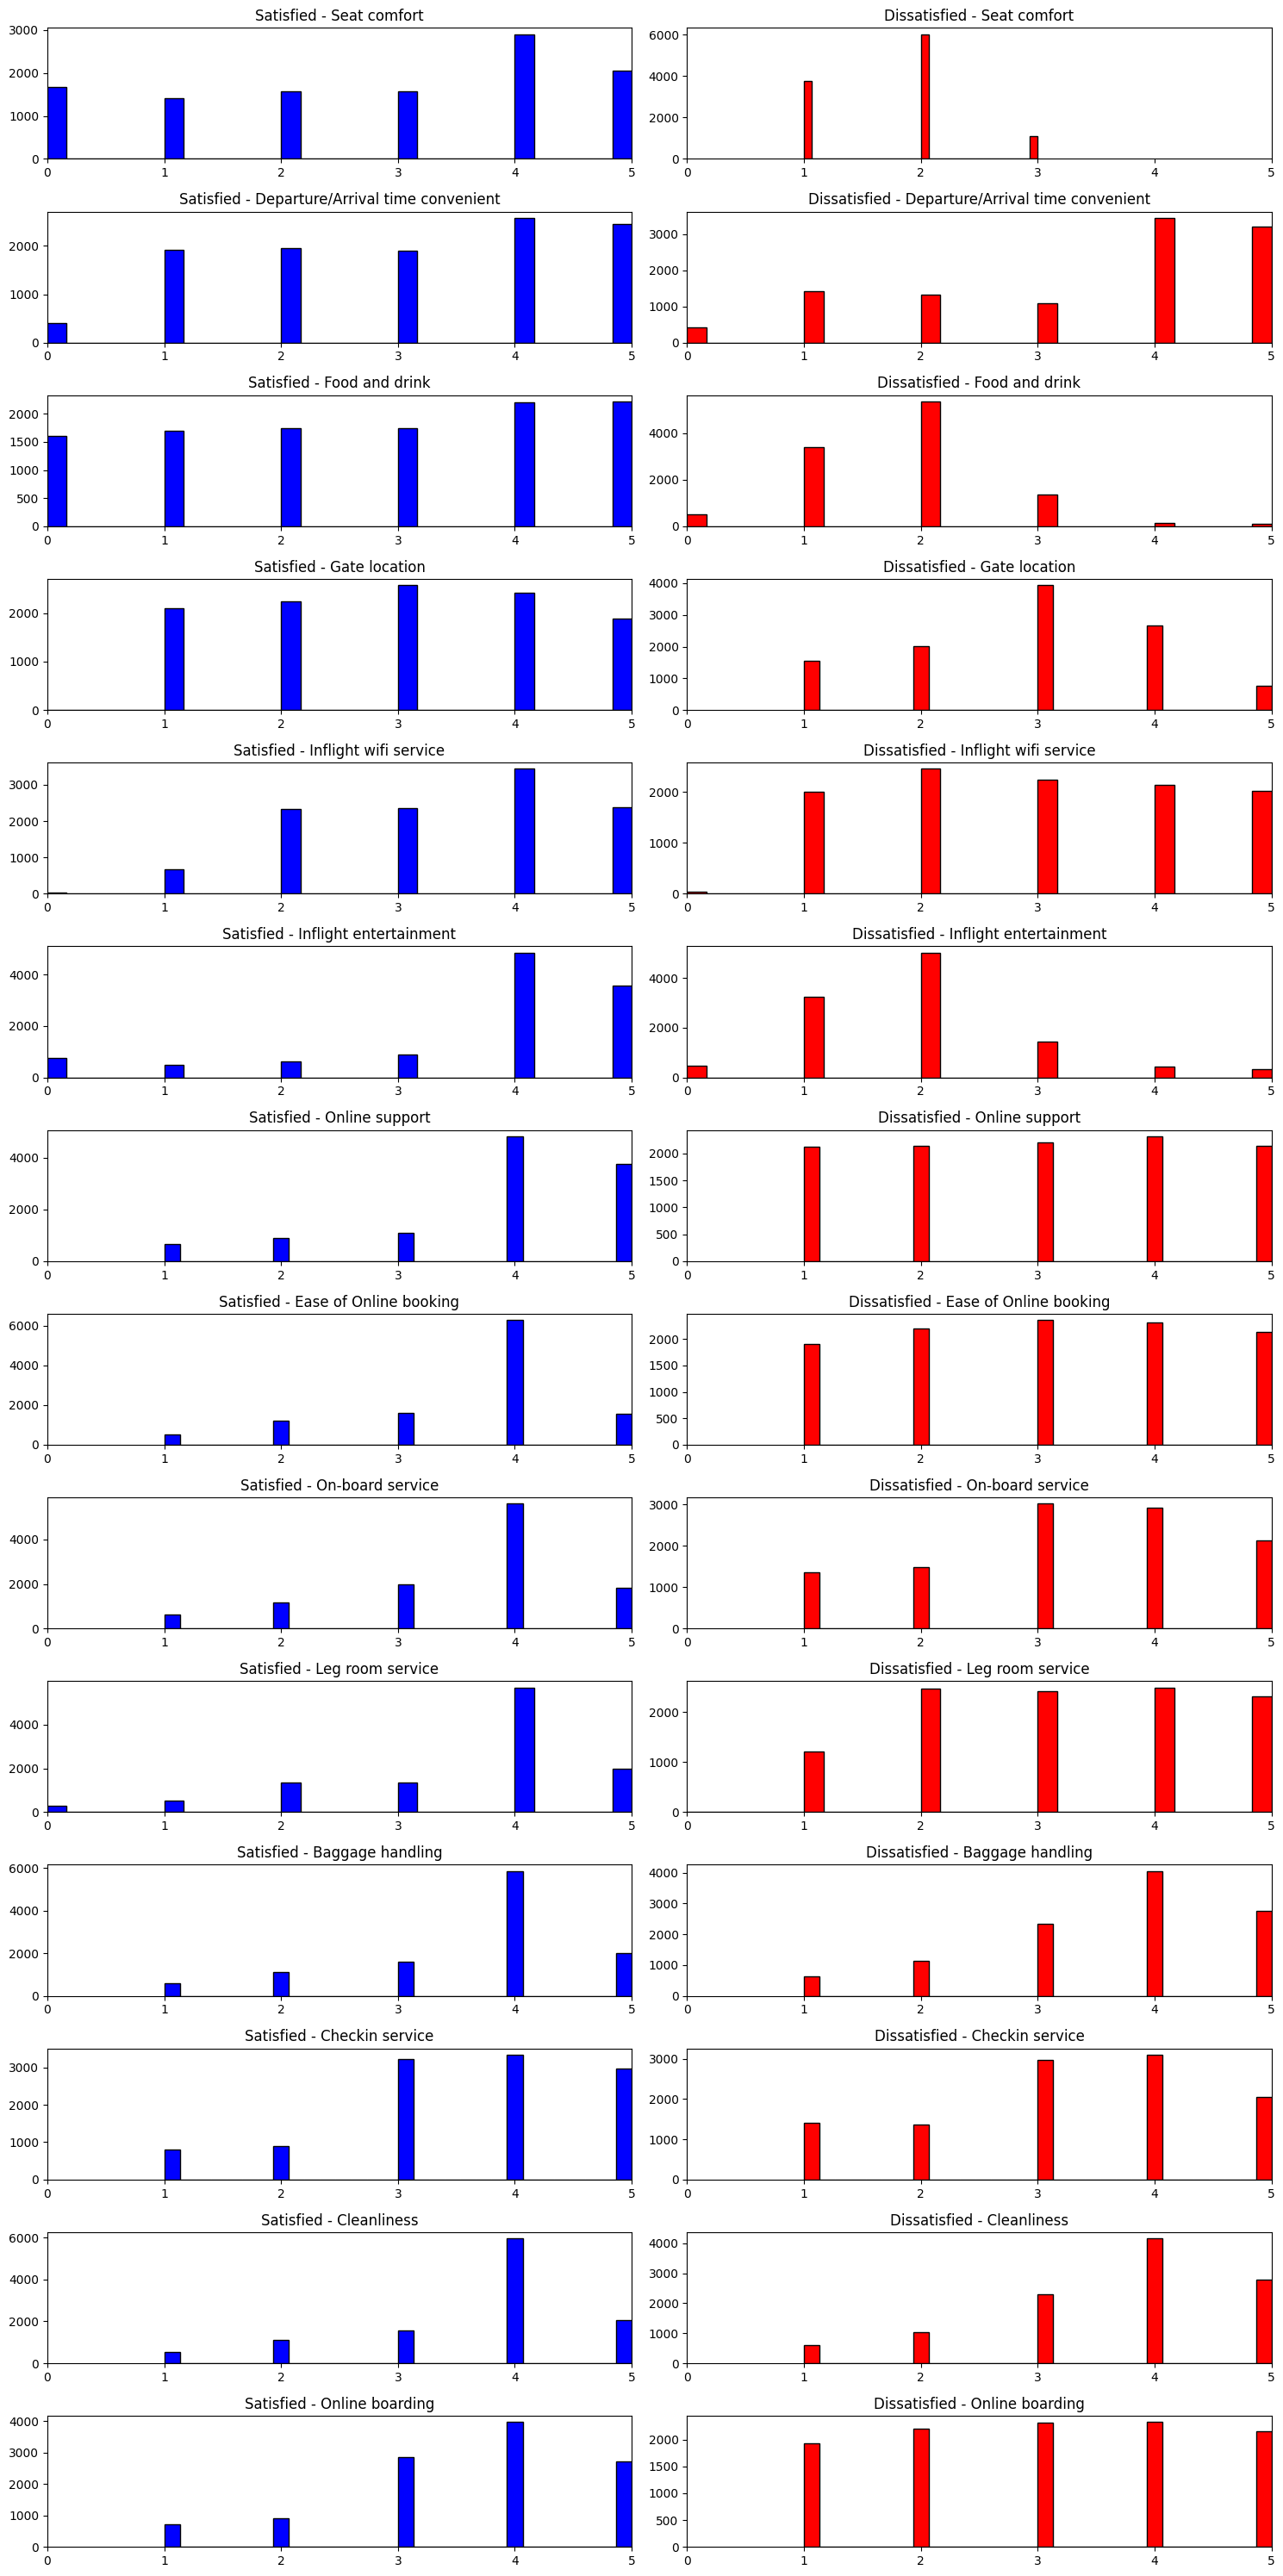

In [16]:
# 클래스 별 시각화
plt.figure(figsize=(15, 30))

for idx, column in enumerate(ordinal_columns):
    plt.subplot(len(ordinal_columns), 2, 2*idx + 1)
    plt.hist(satisfied[column], color='blue', label='Satisfied', bins=30, edgecolor='black')
    plt.xlim(0, 5)
    plt.title(f'Satisfied - {column}')

    plt.subplot(len(ordinal_columns), 2, 2*idx + 2)
    plt.hist(dissatisfied[column], color='red', label='Dissatisfied', bins=30, edgecolor='black')
    plt.xlim(0, 5)
    plt.title(f'Dissatisfied - {column}')

plt.tight_layout()
plt.show()

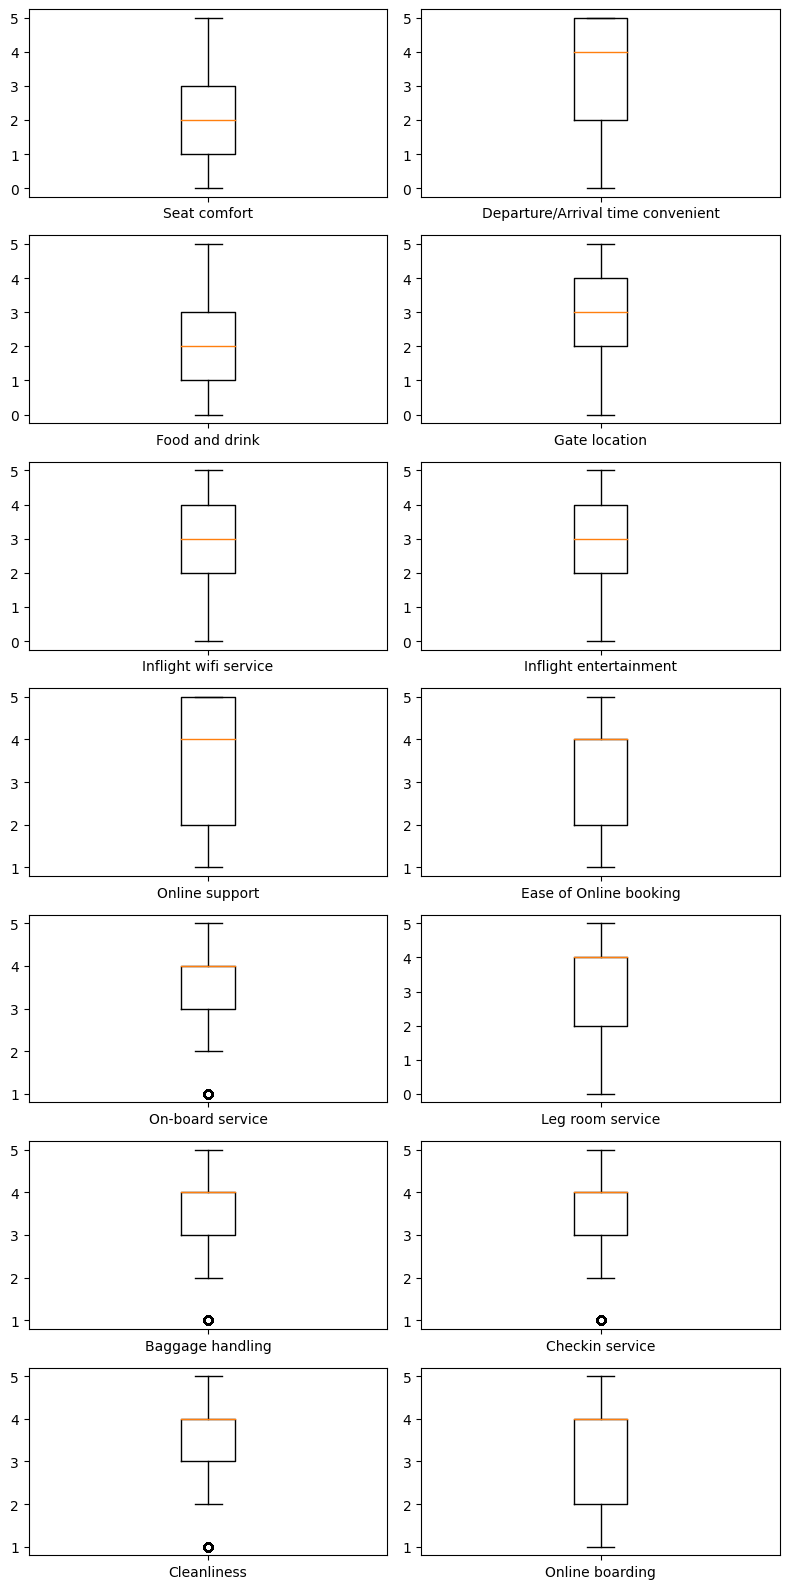

In [17]:
# 전반적인 평균과 치우침 확인
plt.figure(figsize=(8, 16))

np.random.seed(seed)
for idx, ordinal in enumerate(ordinal_columns) :

    plt.subplot(len(ordinal_columns)//2, 2, idx+1)
    plt.boxplot(ordinal_data[ordinal].dropna(), labels=[ordinal])

plt.tight_layout()
plt.show()

### 상관관계

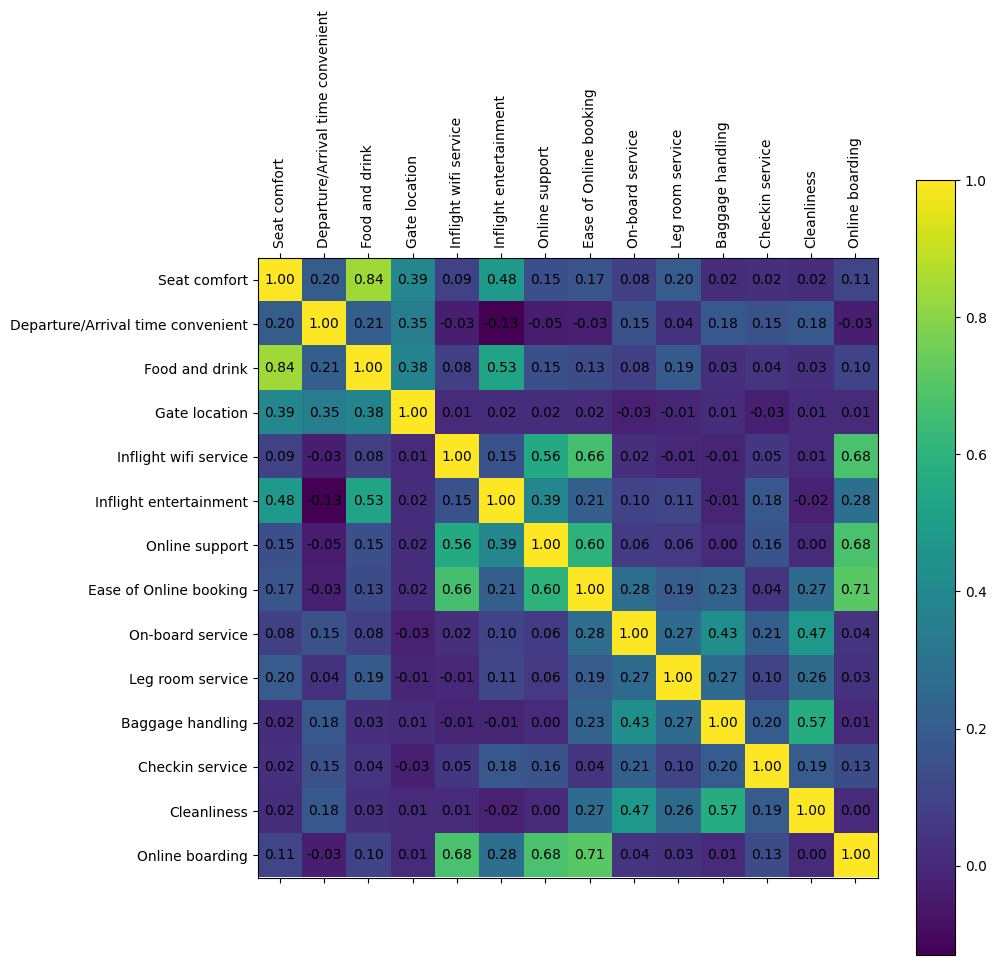

In [18]:
correlation_matrix = ordinal_data.corr()

# 상관관계 메트릭스 시각화
plt.figure(figsize=(10, 10))

plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

# # 상관관계 값 프린트 > 너무 길어서 생략
# print('#'*20, '상관관계 값 확인', '#'*20)
# print(correlation_matrix)

## 범주형 데이터 분석

### 분포 확인

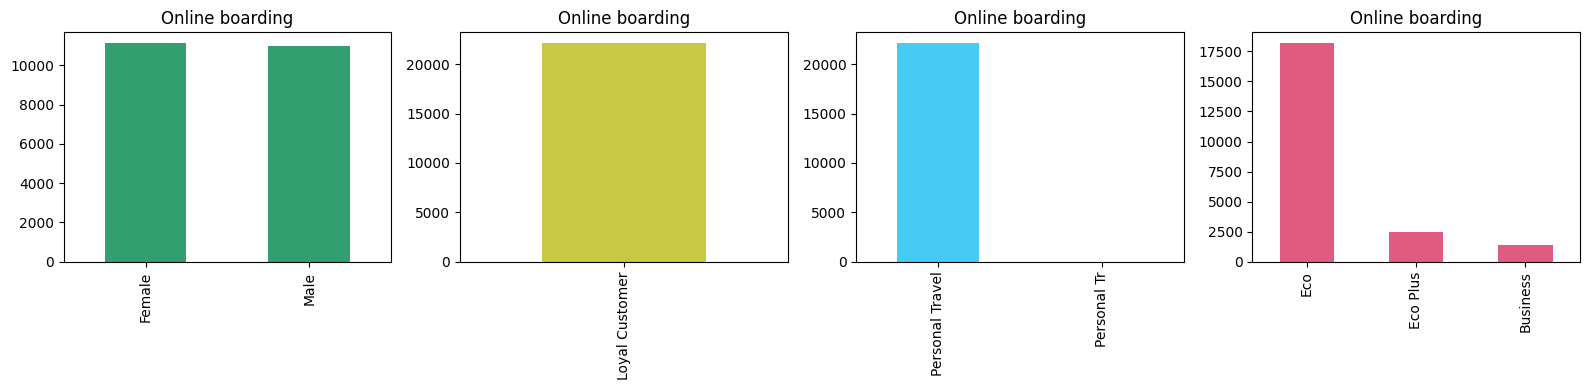

In [19]:
# 전체 데이터 분포 확인
category_data = airplane[category_columns]

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 4))

np.random.seed(seed)
for idx, category in enumerate(category_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(1, 4, idx+1)
    category_data[category].value_counts().plot(kind='bar', color=col)
    plt.title(column)
    plt.tight_layout()

plt.tight_layout()
plt.show()

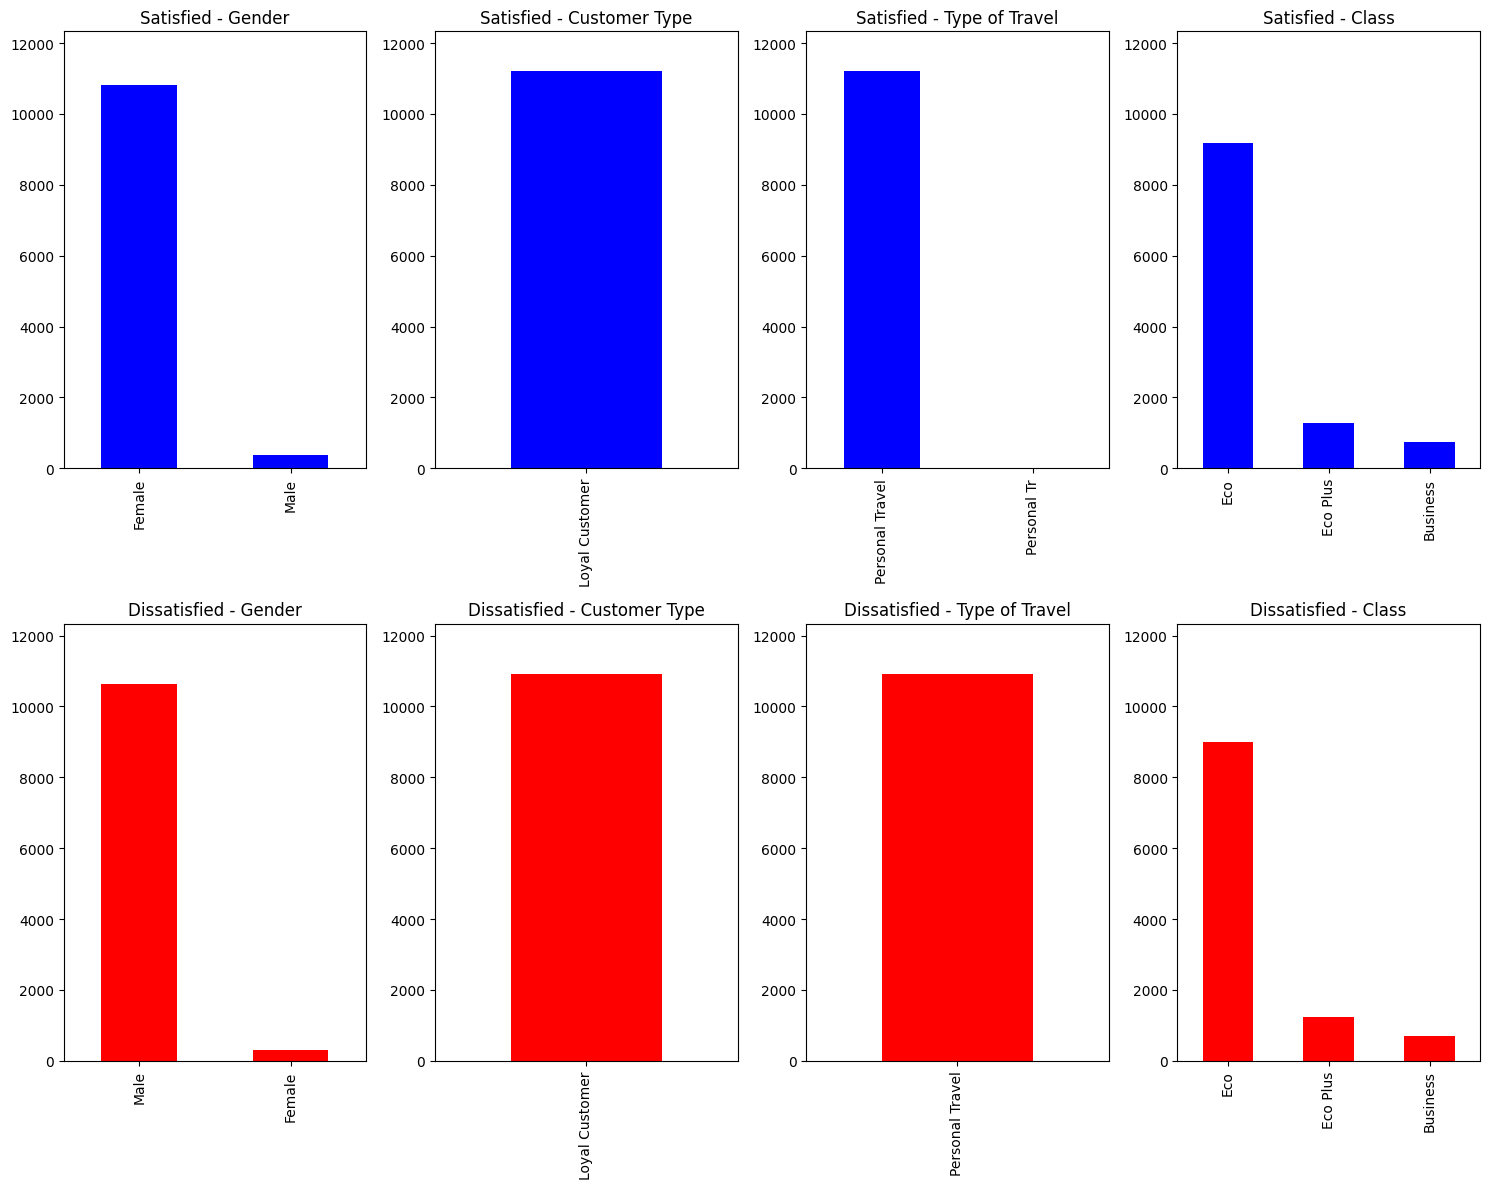

In [20]:
# 클래스 별 시각화
plt.figure(figsize=(15, 12))

max_count_satisfied = max(satisfied[column].value_counts().max() for column in category_columns)
max_count_dissatisfied = max(dissatisfied[column].value_counts().max() for column in category_columns)
max_count = max(max_count_satisfied, max_count_dissatisfied) * 1.1

for idx, column in enumerate(category_columns):
    plt.subplot(2, 4, idx + 1)
    satisfied[column].value_counts().plot(kind='bar', color='blue')
    plt.title(f'Satisfied - {column}')
    plt.ylim(0, max_count)
    plt.tight_layout()

    plt.subplot(2, 4, idx + 5)
    dissatisfied[column].value_counts().plot(kind='bar', color='red')
    plt.title(f'Dissatisfied - {column}')
    plt.ylim(0, max_count)
    plt.tight_layout()

plt.show()

# 데이터 전처리

## NA 값 및 EDA를 기반으로 제거할 값 제거

In [21]:
airplane_cleaned = airplane.dropna() # na값 제거
time_limit = 300 # 지연 시간 5시간 이상은 제거
airplane_cleaned = airplane_cleaned[(airplane_cleaned['Arrival Delay in Minutes'] < time_limit) &
                                    (airplane_cleaned['Departure Delay in Minutes'] < time_limit)]

airplane_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21981 entries, 0 to 22120
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       21981 non-null  object 
 1   Gender                             21981 non-null  object 
 2   Customer Type                      21981 non-null  object 
 3   Age                                21981 non-null  int64  
 4   Type of Travel                     21981 non-null  object 
 5   Class                              21981 non-null  object 
 6   Flight Distance                    21981 non-null  float64
 7   Seat comfort                       21981 non-null  float64
 8   Departure/Arrival time convenient  21981 non-null  float64
 9   Food and drink                     21981 non-null  float64
 10  Gate location                      21981 non-null  float64
 11  Inflight wifi service              21981 non-null  flo

## 카테고리형 변수 인코딩


In [22]:
airplane_cate_encoded = pd.get_dummies(airplane_cleaned[category_columns], drop_first=True)
airplane_target_encoded = pd.get_dummies(airplane_cleaned[y_column], drop_first=True)


airplane_combined = pd.concat([airplane_target_encoded,
                               airplane_cleaned[numeric_columns + ordinal_columns],
                               airplane_cate_encoded],
                              axis=1)
airplane_combined

,satisfaction_satisfied,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Gender_Male,Class_Eco,Class_Eco Plus
0,1,65,265.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,...,3.0,3.0,0.0,3.0,5.0,3.0,2.0,0,1,0
2,1,15,2138.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,...,2.0,3.0,3.0,4.0,4.0,4.0,2.0,0,1,0
3,1,60,623.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,...,1.0,1.0,0.0,1.0,4.0,1.0,3.0,0,1,0
4,1,70,354.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,...,2.0,2.0,0.0,2.0,4.0,2.0,5.0,0,1,0
5,1,30,1894.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,...,2.0,5.0,4.0,5.0,5.0,4.0,2.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22116,0,12,3470.0,1.0,0.0,3.0,2.0,3.0,4.0,4.0,...,4.0,3.0,4.0,4.0,2.0,4.0,4.0,1,1,0
22117,0,25,3654.0,16.0,0.0,3.0,2.0,3.0,4.0,5.0,...,5.0,4.0,3.0,3.0,4.0,4.0,5.0,1,0,1
22118,1,46,2308.0,0.0,0.0,4.0,4.0,4.0,4.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0,1,0
22119,0,67,3771.0,0.0,5.0,3.0,2.0,3.0,4.0,3.0,...,4.0,4.0,2.0,4.0,4.0,1.0,4.0,1,1,0


## 상관 관계가 큰 특성만 취하기!

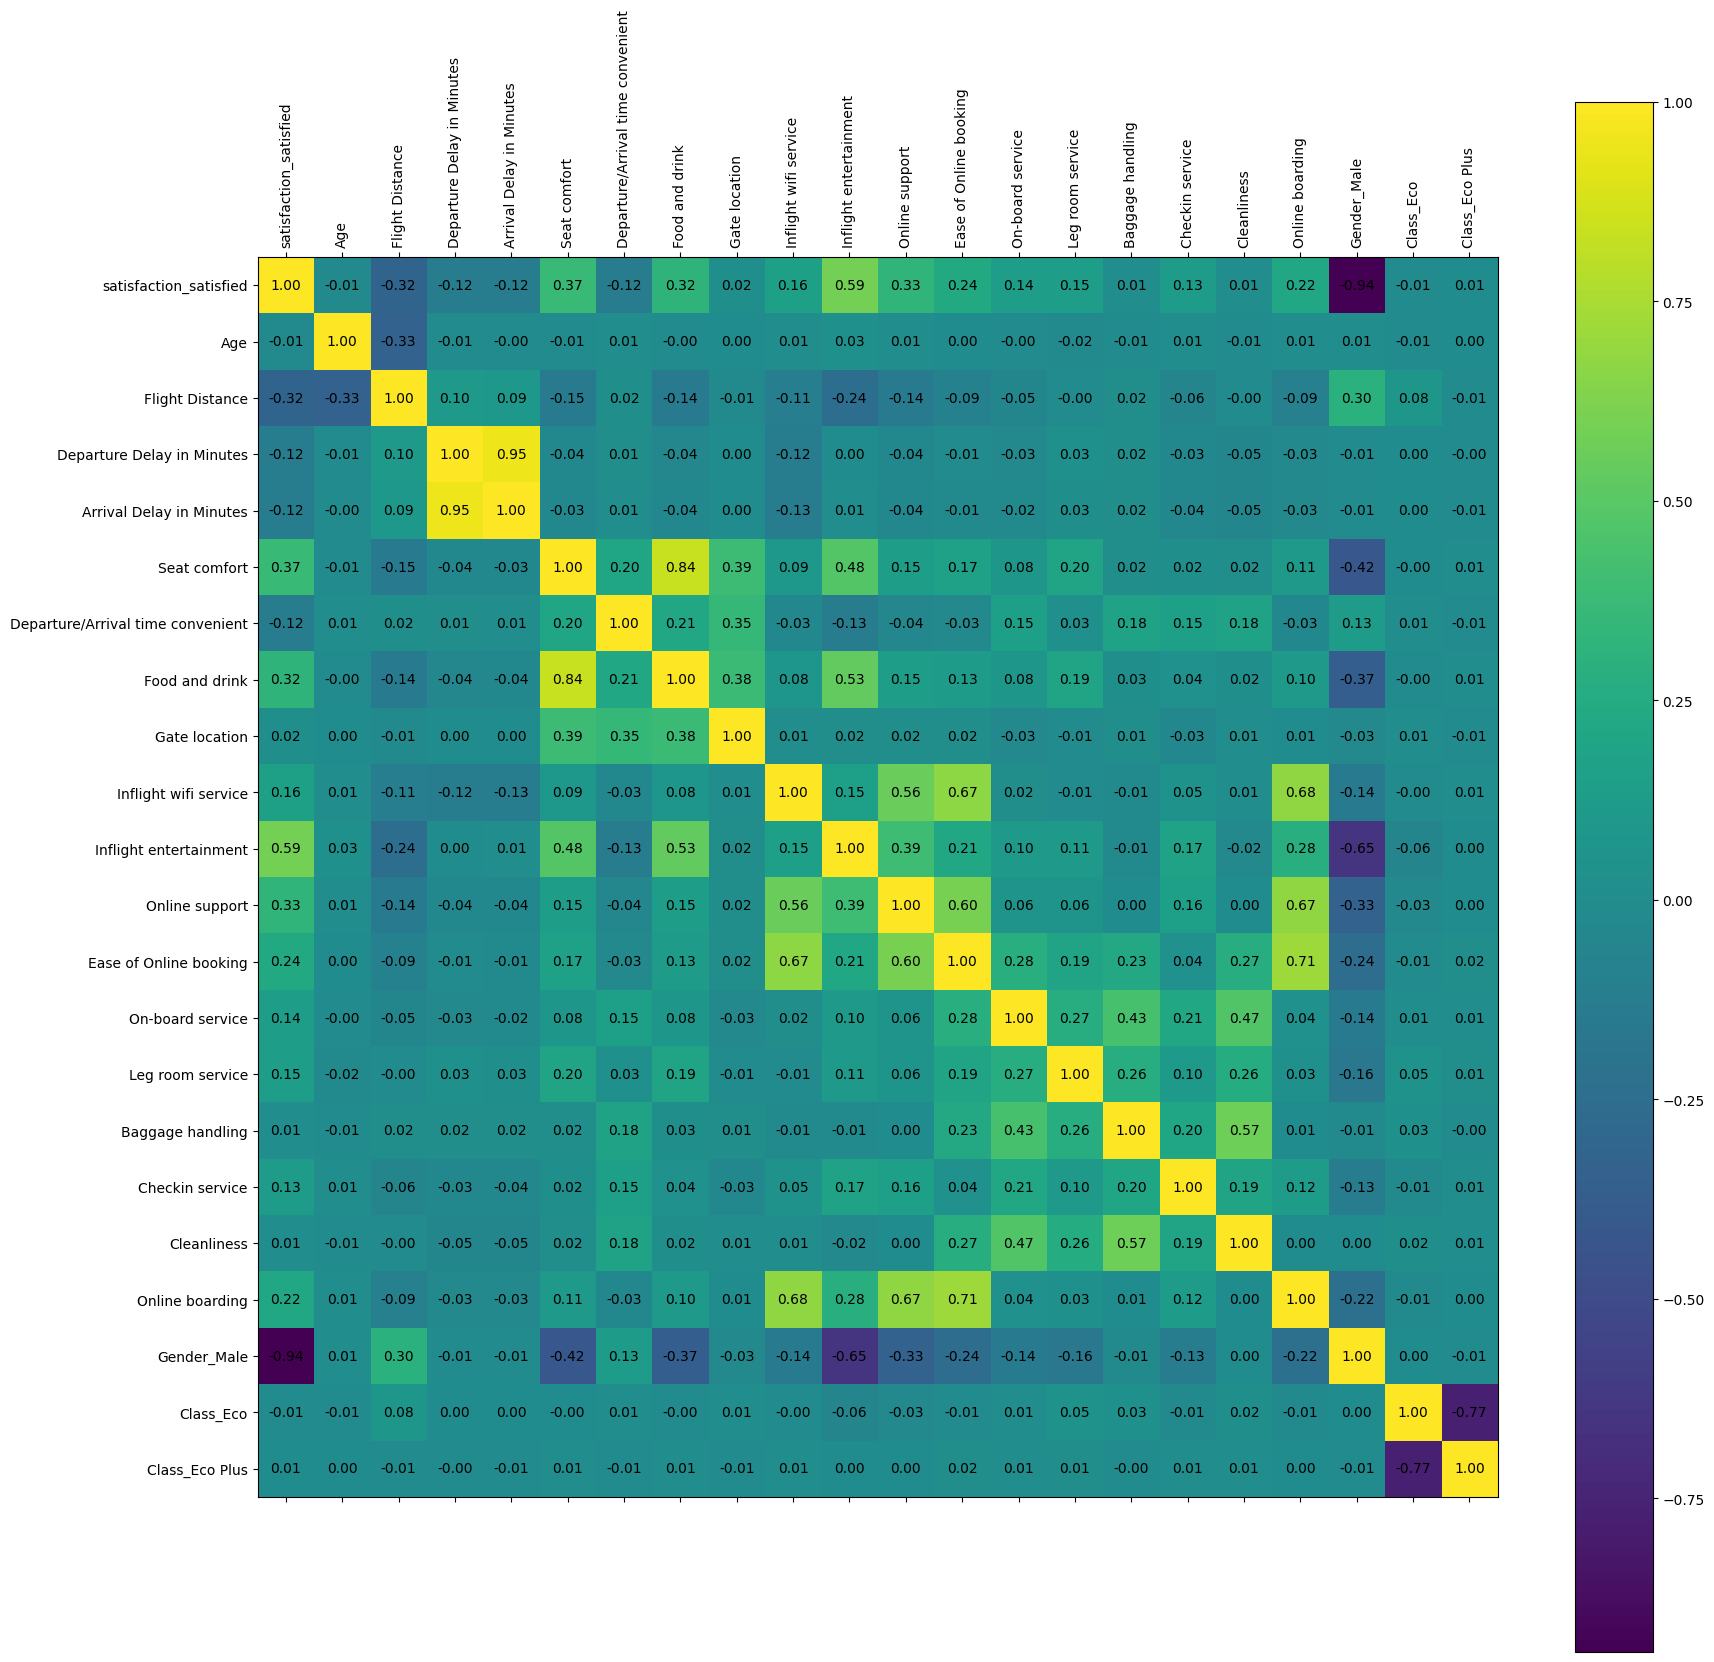

In [23]:
# 모든 변수 간 상관관계를 계산
correlation_matrix_combined = airplane_combined.corr()

plt.figure(figsize=(20, 20))

plt.matshow(correlation_matrix_combined, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix_combined.columns)), correlation_matrix_combined.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_combined.columns)), correlation_matrix_combined.columns)

for (i, j), val in np.ndenumerate(correlation_matrix_combined):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

In [24]:
# 목표로 하는 target column과 가장 상관관계가 큰 15개를 선택!
select_num = 15
target_correlations = correlation_matrix_combined[airplane_target_encoded.columns[0]].abs().sort_values(ascending=False)
top_features_with_target = target_correlations[1:select_num+1].index.tolist()
top_features_with_target

['Gender_Male',
 'Inflight entertainment',
 'Seat comfort',
 'Online support',
 'Food and drink',
 'Flight Distance',
 'Ease of Online booking',
 'Online boarding',
 'Inflight wifi service',
 'Leg room service',
 'On-board service',
 'Checkin service',
 'Departure/Arrival time convenient',
 'Arrival Delay in Minutes',
 'Departure Delay in Minutes']

In [25]:
data = airplane_combined[target_correlations[:select_num+1].index.tolist()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21981 entries, 0 to 22120
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction_satisfied             21981 non-null  uint8  
 1   Gender_Male                        21981 non-null  uint8  
 2   Inflight entertainment             21981 non-null  float64
 3   Seat comfort                       21981 non-null  float64
 4   Online support                     21981 non-null  float64
 5   Food and drink                     21981 non-null  float64
 6   Flight Distance                    21981 non-null  float64
 7   Ease of Online booking             21981 non-null  float64
 8   Online boarding                    21981 non-null  float64
 9   Inflight wifi service              21981 non-null  float64
 10  Leg room service                   21981 non-null  float64
 11  On-board service                   21981 non-null  flo

In [28]:
# 추출된 특징 이름
# 수치형 데이터는 추출 x
y_column = ['satisfaction_satisfied']
ordinal_columns = ['Inflight entertainment', 'Ease of Online booking',
                   'Online support', 'On-board service',
                   'Online boarding', 'Leg room service',
                   'Checkin service', 'Baggage handling',
                   'Cleanliness', 'Seat comfort',
                   'Inflight wifi service', 'Food and drink']
category_columns = ['Customer Type_disloyal Customer', 'Class_Eco',
                    'Gender_Male']

## 학습 및 평가 데이터 분리


In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(y_column, axis=1)
y = data[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [30]:
print('#'*20, 'X_train', '#'*20)
print(X_train.head, end='\n')
print('#'*20, 'Y_train', '#'*20)
print(y_train.head, end='\n\n')
print('#'*20, 'X_test', '#'*20)
print(X_test.head, end='\n')
print('#'*20, 'Y_test', '#'*20)
print(y_test.head, end='\n')

#################### X_train ####################
<bound method NDFrame.head of        Gender_Male  Inflight entertainment  Seat comfort  Online support  \
908              0                     1.0           1.0             1.0   
2295             0                     5.0           5.0             4.0   
4476             0                     5.0           0.0             4.0   
6788             1                     1.0           1.0             5.0   
3930             1                     1.0           1.0             2.0   
...            ...                     ...           ...             ...   
12048            0                     4.0           5.0             5.0   
21713            0                     4.0           5.0             4.0   
5428             0                     4.0           3.0             4.0   
867              1                     1.0           1.0             5.0   
15900            0                     4.0           2.0             4.0   

       

# 모델 구축 및 결과 확인

## 학습 진행

In [31]:
# 이번 실습에서는 w0에 해당하는 편향(bias) 부분 추가 x

In [32]:
from sklearn.linear_model import LogisticRegression

# 선형 회귀 모델 초기화 및 학습
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)


# 학습된 모델의 계수(coefficients) 및 절편(intercept) 출력
coefficients = logistic_reg.coef_
intercept = logistic_reg.intercept_

print('#'*20, '학습된 파라미터 값', '#'*20)
print(coefficients)

print('#'*20, '학습된 절편 값', '#'*20)
print(intercept)

#################### 학습된 파라미터 값 ####################
[[-3.65992396e+00  1.17425979e+00  1.01892636e-02  4.42334666e-01
  -9.31348581e-01 -6.80817922e-04  2.82566512e-01 -8.41676079e-02
  -3.00752266e-01  1.79558206e-01  3.34901755e-01  1.59291119e-01
  -2.21252885e-01 -2.10052865e-02  8.94333460e-03]]
#################### 학습된 절편 값 ####################
[-0.25328967]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 학습 모델 평가 진행

In [34]:
from sklearn.metrics import accuracy_score

# 예측 수행
y_train_pred = logistic_reg.predict(X_train)
y_test_pred = logistic_reg.predict(X_test)

# 평가 지표 계산: 정확도 (맞은수/전체)
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('학습 데이터를 이용한 Acc 값 :', acc_train)
print('평가 데이터를 이용한 Acc 값 :', acc_test)


학습 데이터를 이용한 Acc 값 : 0.9311305732484076
평가 데이터를 이용한 Acc 값 : 0.939504207414146


In [35]:
# Confusion matrix 생성을 위한 준비
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

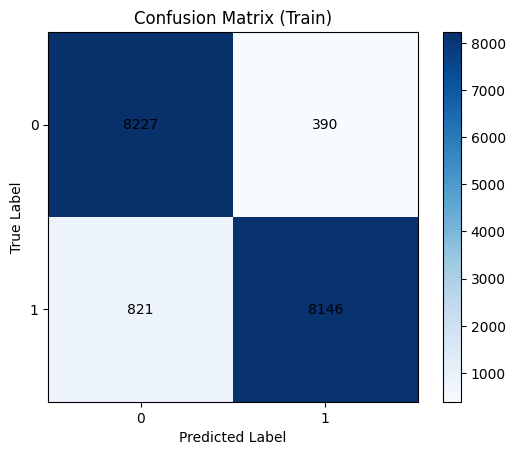

In [36]:
# 학습 데이터를 활용한 confusion matrix

plt.imshow(cm_train, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix (Train)")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_train)))
plt.xticks(tick_marks, np.unique(y_train))
plt.yticks(tick_marks, np.unique(y_train))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# 각 셀에 숫자 표시
for i in range(cm_train.shape[0]):
    for j in range(cm_train.shape[1]):
        plt.text(j, i, cm_train[i, j], ha="center", va="center", color="black")


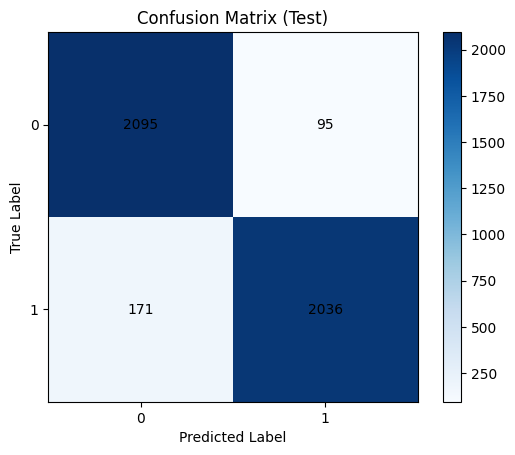

In [37]:
# 평가 데이터를 활용한 confusion matrix

plt.imshow(cm_test, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix (Test)")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# 각 셀에 숫자 표시
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        plt.text(j, i, cm_test[i, j], ha="center", va="center", color="black")

## 결과 해석

### 로지스틱 회귀 모델에 영향을 미치는 변수의 중요도

In [ ]:
coeff_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': logistic_reg.coef_.flatten()})

# 계수의 절대값을 기준으로 내림차순 정렬
coeff_df['abs_coefficient'] = coeff_df['coefficient'].abs()
coeff_df_sorted = coeff_df.sort_values(by='abs_coefficient', ascending=False)

# 변수의 영향력을 확인
coeff_df_sorted

,feature,coefficient,abs_coefficient
6,Customer Type_disloyal Customer,-1.336765,1.336765
13,Gender_Male,-0.999287,0.999287
7,Class_Eco,-0.936297,0.936297
0,Inflight entertainment,0.731455,0.731455
1,Ease of Online booking,0.316628,0.316628
3,On-board service,0.278986,0.278986
14,Food and drink,-0.259190,0.259190
11,Seat comfort,0.255461,0.255461
8,Checkin service,0.250757,0.250757
5,Leg room service,0.219351,0.219351


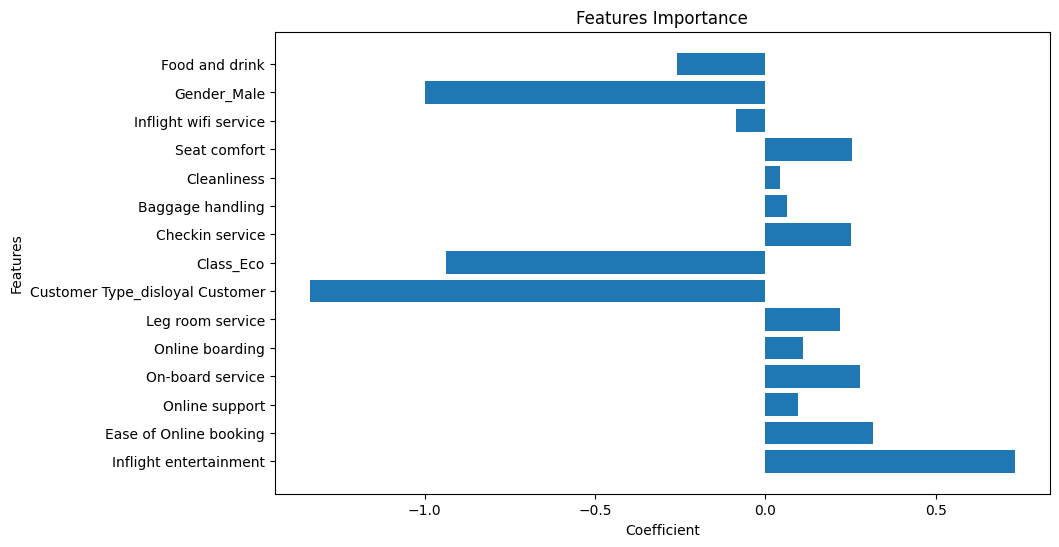

In [ ]:
# 변수 영향력 시각화
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, logistic_reg.coef_.flatten())
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.title('Features Importance')
plt.show()